<a href="https://colab.research.google.com/github/SamPasco2024/stockdata/blob/main/RedGreenWhite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dt = pd.read_csv("https://raw.githubusercontent.com/SamPasco2024/stockdata/main/RedGreenWhite.csv")
#dataframe = dt.drop("Date", axis =1 )
dt

,Date,Open,High,Low,Close,FW Moving Average 25,RWG
0,44693.51389,388.750,389.31,388.260,389.1950,389.4085,White
1,44693.51528,389.195,390.07,388.695,389.7100,389.3806,Green
2,44693.51667,389.710,389.83,389.290,389.5600,389.3487,White
3,44693.51806,389.560,390.31,389.450,390.0500,389.3606,Green
4,44693.51944,390.060,390.83,389.980,390.7135,389.4291,Green
...,...,...,...,...,...,...,...
1610,44705.58333,391.300,391.68,391.260,391.4700,390.7673,White
1611,44705.58472,391.470,391.65,390.850,390.9200,390.8159,Red
1612,44705.58611,390.920,391.22,390.840,391.1000,390.8731,White
1613,44705.58750,391.100,391.19,390.670,390.9600,390.9145,White


In [ ]:
greens = 0
reds = 0
whites = 0
for i in range(len(dt)-1):

  if (dt["RWG"][i] == "Green"):
    greens+=1
  elif (dt["RWG"][i] == "Red"):
    reds+=1
  else:
    whites +=1

print("greens:", greens)
print("reds:", reds)
print("whites:", whites)

greens: 399
reds: 406
whites: 809


In [ ]:
redTHENgreen = 0
greenTHENred = 0

for i in range(len(dt)-1):

  if (dt["RWG"][i] == "Red") and (dt["RWG"][i+1] == "Green"):
    redTHENgreen+=1
  
  if (dt["RWG"][i] == "Green") and (dt["RWG"][i+1] == "Red"):
    greenTHENred+=1

print("redTHENgreen:", redTHENgreen)
print("greenTHENred:", greenTHENred)

redTHENgreen: 42
greenTHENred: 40


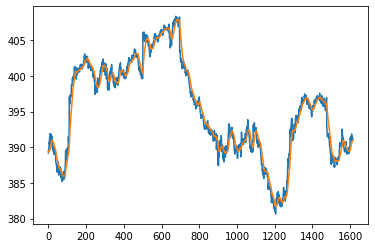

In [ ]:
plt.plot(dt['Close'])
plt.plot(dt['FW Moving Average 25'])

bankroll: 24723.85180000001


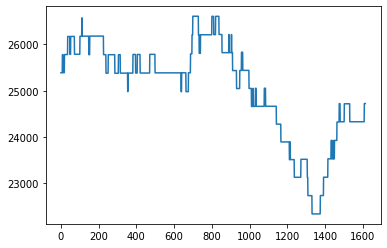

In [47]:
#Setting up Variables
bankroll = 25000
betON = False
bankroll_log = []


#For Loop
for i in range(len(dt)-1):
  
  #GOING UP
  #Buying
  if (dt["Close"][i] > dt["FW Moving Average 25"][i] and betON == False):
    bankroll = bankroll - dt["Close"][i]
    betON = True
  #Selling on GreenthenRed
  if (dt["RWG"][i] == "Green") and (dt["RWG"][i+1] == "Red" and betON == True):
    bankroll = bankroll + dt["Close"][i]

  #GOING DOWN
  #Shorting
  if (dt["Close"][i] < dt["FW Moving Average 25"][i] and betON == False):
    bankroll = bankroll + dt["Close"][i]
    betON = True
  #Buying back on RedthenGreen
  if (dt["RWG"][i] == "Red") and (dt["RWG"][i+1] == "Green" and betON == True):
    bankroll = bankroll - dt["Close"][i]
  
  bankroll_log.append(bankroll)
  

###Plotting
my_array = np.array(bankroll_log)
print("bankroll:", bankroll)
plt.plot(my_array)